In [ ]:
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.layers import BatchNormalization
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
open_file = open('/content/drive/MyDrive/pickleTien/X.p',"rb")
pixels=pickle.load(open_file)
open_file.close()

open_file = open('/content/drive/MyDrive/pickleTien/y.p',"rb")
labels=pickle.load(open_file)
open_file.close()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
pixels,labels, test_size=0.2)

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
# load dataset
#(trainX, trainY), (testX, testY) = cifar10.load_data()
#print(X_train.shape)
# one hot encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_test.shape

(3604, 18)

In [ ]:

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu',  padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu',  padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(18, activation='softmax'))
# compile model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()
'''
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(18, activation='softmax'))
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()
'''

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 128)      

In [ ]:
#train model
h = model.fit(X_train,y_train,validation_data=(X_test,y_test ),epochs=50)
 
#save model
model.save('final_model.h5')

Epoch 1/50
451/451 [==============================] - 25s 55ms/step - loss: 0.0478 - accuracy: 0.9983 - val_loss: 7.4256e-05 - val_accuracy: 1.0000
Epoch 2/50
451/451 [==============================] - 24s 53ms/step - loss: 0.0336 - accuracy: 0.9982 - val_loss: 0.0363 - val_accuracy: 0.9978
Epoch 3/50
451/451 [==============================] - 24s 53ms/step - loss: 0.0654 - accuracy: 0.9977 - val_loss: 0.0109 - val_accuracy: 0.9986
Epoch 4/50
451/451 [==============================] - 24s 53ms/step - loss: 0.0246 - accuracy: 0.9994 - val_loss: 1.5134e-05 - val_accuracy: 1.0000
Epoch 5/50
451/451 [==============================] - 25s 54ms/step - loss: 0.0113 - accuracy: 0.9996 - val_loss: 0.0252 - val_accuracy: 0.9994
Epoch 6/50
451/451 [==============================] - 24s 53ms/step - loss: 0.0073 - accuracy: 0.9998 - val_loss: 0.0164 - val_accuracy: 0.9997
Epoch 7/50
451/451 [==============================] - 24s 53ms/step - loss: 0.0593 - accuracy: 0.9980 - val_loss: 3.4927e-04 - v

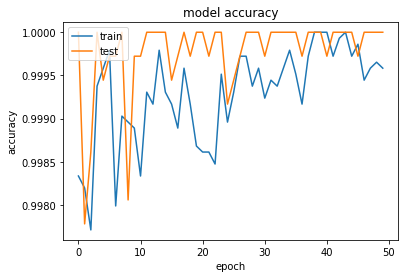

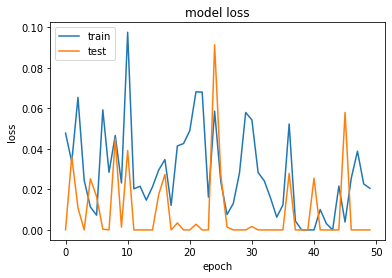

In [ ]:
# Baseline model with data augmentation for the dogs vs cats dataset
import sys
from matplotlib import pyplot as plt
history = h
# Plot diagnostic learning curves

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




In [ ]:
import cv2 as cv
import numpy as np
from keras.models import load_model

img = cv.imread("/content/drive/MyDrive/pickleTien/96.png")
img = cv.resize(img,(128,128))
img = np.expand_dims(img,axis=0)
img.shape
model = load_model('final_model.h5')

result = model.predict(img)
kq = np.argmax(result)
print(kq)
##print(result[kq])





14


In [ ]:
img = cv.imread("/content/drive/MyDrive/pickleTien/17.png")
img = cv.resize(img,(128,128))
img = np.expand_dims(img,axis=0)
img.shape
#model = load_model('final_model.h5')

result = model.predict(img)
kq = np.argmax(result)
print(kq)

14
